## Basics

In [1]:
from primitives import Parameters
p = Parameters()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%%timeit
from ContinuousContract_inv_slow import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p)
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J(0)

EJinv avg diff 0.08624039774508219
EJinv max diff 6.229150918243765
EJinv avg diff 0.7187457090048448
EJinv max diff 480.9533446392165


AssertionError: 

In [3]:
#print("Before first call:", cc.__dict__)
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi)=cc.J(0)
#print("After first call:", cc.__dict__)

In [5]:
(cc.fun_prod.min()-cc.fun_prod.max())/(1-p.beta) #Bruh. Paying THE HIGHEST wage all the time at THE LOWEST productivity still yields better value than what the polynomial predicts.
#Yeah, I don't see why I should keep using the parametric approximation.
#Maybe it's better for the middle values or something???
#I dunno man, this stuff's weird 

-720.3487089542124

In [3]:
from ContinuousContract_inv import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) #this is continuous contract with FOC that writes the expectation as a function of today's value
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J(0)

J without wage [ 289.38801079  289.38809186  289.38817662  289.38826507  289.3883573
  289.38845338  289.38855338  289.38865741  289.38876553  289.38887785
  289.38899447  289.38911547  289.38924095  289.38937101  289.38950577
  289.38964532  289.38978976  289.38993923  289.39009381  289.39025364
  289.39041883  289.39058949  289.39076577  289.39094778  289.39113565
  289.39132953  289.39152953  289.39173582  289.39194852  289.39216779
  289.39239378  289.39262665  289.39286654  289.39311363  289.39336808
  289.39363006  289.39389974  289.39417732  289.39446295  289.39475685
  289.39505919  289.39537019  289.39569003  289.39601893  289.3963571
  289.39670476  289.39706213  289.39742944  289.39780694  289.39819485
  289.39859343  289.39900293  289.39942362  289.39985575  289.40029961
  289.40075547  289.40122363  289.40170437  289.40219801  289.40270485
  289.40322521  289.40375943  289.40430783  289.40487077  289.40544859
  289.40604166  289.40665036  289.40727507  289.40791618  289.40

In [9]:
from ContinuousContract_inv_avgw import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) 
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

AttributeError: 'JobSearchArray' object has no attribute 'p'

In [ ]:
#(ccinv_J,ccinv_W,ccinv_Wstar)=cc.J() #wtf??? this takes SO MUCH MORE TIME!!!

# Plots

In [4]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

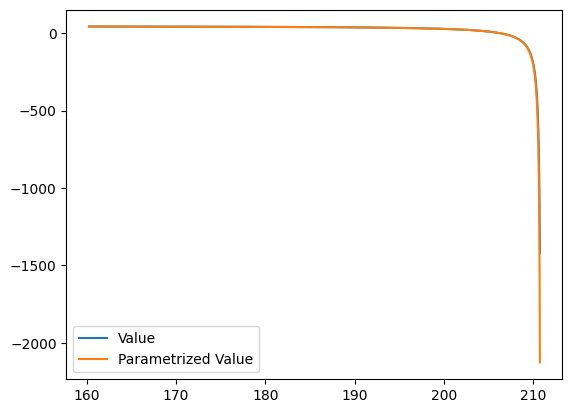

In [5]:
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Value')
plt.plot(cc_W[p.z_0-1, :], cc_Jpi[p.z_0-1, :], label='Parametrized Value')
plt.legend()
plt.show()

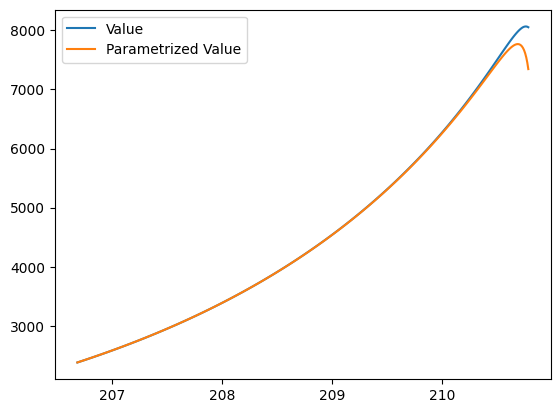

In [ ]:
plt.plot(cc_W[p.z_0-1, 80:], cc_J[p.z_0-1, 80:]+cc.rho_grid[80:] * cc_W[p.z_0-1,80:], label='Value')
#plt.plot(cc_W[p.z_0-1, 80:], cc_Jpi[p.z_0-1, 80:]+cc.rho_grid[80:] * cc_W[p.z_0-1,80:], label='Parametrized Value')
plt.legend()
plt.show()

Text(0, 0.5, 'Future value')

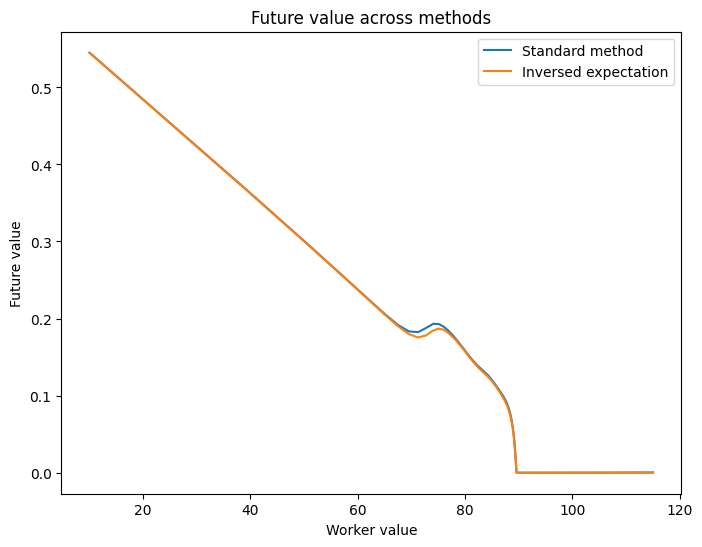

In [7]:
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_Wstar[p.z_0-1, :]-cc_W[p.z_0-1, :], label='Standard method')
plt.plot(ccinv_W[p.z_0-1,:], ccinv_Wstar[p.z_0-1, :]-ccinv_W[p.z_0-1,:], label='Inversed expectation')
plt.legend()
# Add titles and labels
plt.title('Future value across methods')
plt.xlabel('Worker value')
plt.ylabel('Future value')

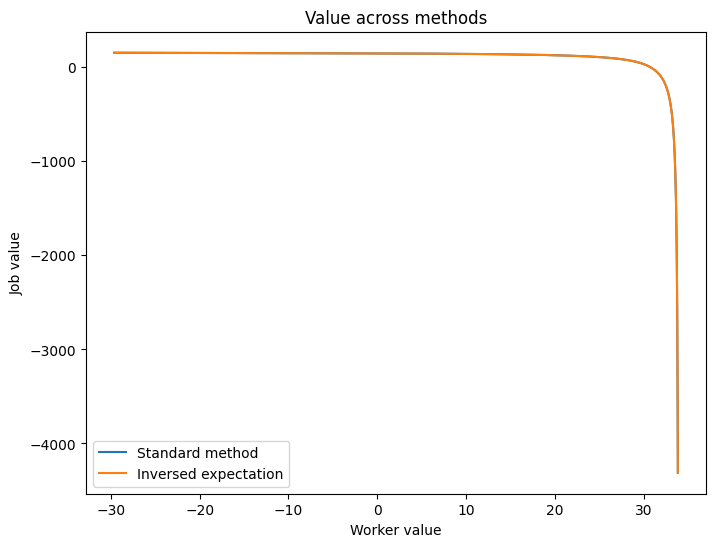

In [10]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Standard method')
plt.plot(ccinv_W[p.z_0-1,:], ccinv_J[p.z_0-1, :], label='Inversed expectation')

# Add titles and labels
plt.title('Value across methods')
plt.xlabel('Worker value')
plt.ylabel('Job value')

# Optionally set x and y limits
# plt.xlim([-30, 30])
# plt.ylim([150, 200])

# Add legend
plt.legend()

# Save the plot to a file in the specified directory
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods.png'), bbox_inches='tight')  # Save as PNG
#

# Optionally set x and y limits
#plt.xlim([0, 20])
#plt.ylim([125, 150])
# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods zoom.png'), bbox_inches='tight')  # Save as PNG

# Show the plot (optional)
plt.show()

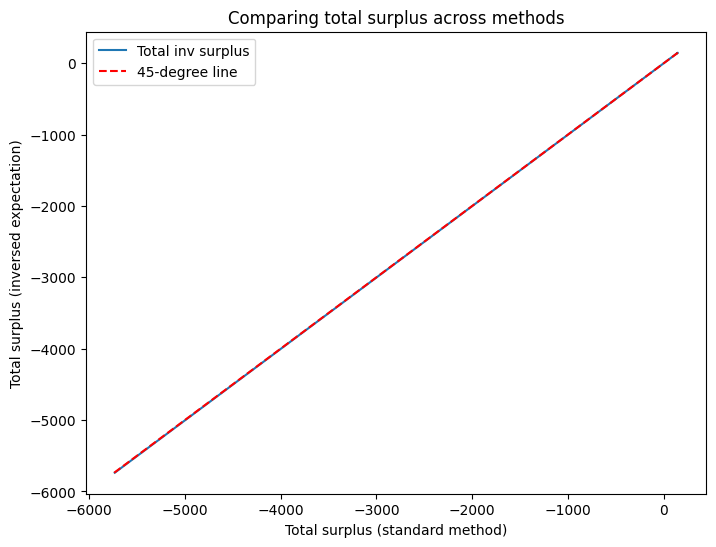

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))#This creates a figure and a set of subplots with a specific size. The size is specified in inches (width, height).

# Plot the original data
ax.plot(cc_W[p.z_0-1,:]+cc_J[p.z_0-1,:], ccinv_W[p.z_0-1,:]+ccinv_J[p.z_0-1,:], label='Total inv surplus')

# Calculate the range for the 45-degree line
x_vals = cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:]
y_vals = ccinv_W[p.z_0-1,:] + ccinv_J[p.z_0-1,:]
min_val = min(min(x_vals), min(y_vals))
max_val = max(max(x_vals), max(y_vals))

# Add the 45-degree line
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='45-degree line')

# Add titles and labels
ax.set_title('Comparing total surplus across methods')
ax.set_xlabel('Total surplus (standard method)')
ax.set_ylabel('Total surplus (inversed expectation)')
ax.legend()

# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Total surplus comparison.png'), bbox_inches='tight')  # Save as PNG
#    plt.savefig(os.path.join(output_dir,'Total surplus comparison.pdf'), bbox_inches='tight')  # Save as PDF

# Show the plot
plt.show()